In [1]:
# Show plots inline, and load main getdist plot module and samples class
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
import matplotlib.pyplot as plt
import IPython
import pylab as mplot
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['figure.figsize'] = (16.,8.)

from chainconsumer import ChainConsumer


In [2]:
def get_names(filename):
    """
    Function to obtain the names of the parameters of your chain
    """
    data = np.genfromtxt(filename, names=True)
    names = np.array(data.dtype.names)
    #print(names)
    #print(len(names))
    return names

def get_indices(filename, list_vars):
    """
    Function to obtain the index in a multinest chain from certain variables.
    """
    indices = []
    names = get_names(filename)
    for var in list_vars:
        indices.extend([i for i,n in enumerate(names) if var==n])
    #return indices, names[indices]
    return indices

def get_om_s8(filename):
    # might be useful later..
    data = np.loadtxt(filename)
    nsample = get_nsample(filename)
    data_params = []
    data_params.append([data[-nsample:,0], data[-nsample:,-3]*(data[-nsample:,0]/0.3)**(0.5)])
    data_params = np.array(data_params[0][:]).T
    weights = data[-nsample:,-1]
    return data_params, weights

def compute_s8(om, sigma_8):
    return sigma_8*(om/0.3)**0.5

In [3]:
dir = '../../data_vectors/gaussian_sims/071222/area12300/July14/chains/'
nlbins = 5

burnin = 150000
kde = 2.

name_plots = 'gs-lcdm'

chainfile_0 = dir + 'gaussian_sims_3x2pt_fourier_lcdm.txt'
name_0 = r'Harmonic space'

chainfile_1 = dir + 'gaussian_sims_3x2pt_real.txt'
name_1 = r'Real space'

chainfile_2 = dir + 'gaussian_sims_3x2pt_fourier_lcdm_fixed_sys_freeIA.txt'
name_2 = r'Harmonic space fixed obs. sys.'

chainfile_3 = dir + 'gaussian_sims_3x2pt_real_lcdm_fixed_sys_freeIA.txt'
name_3 = r'Real space fixed obs. sys.'

chainfile_4 = dir + 'prior_3x2pt_lcdm.txt'
name_4 = r'Prior'

colors = ["#474747", "#6992C2", "#C0E0FF", "#FADA77", "#FEB580", 'tomato', 'firebrick']

save_plots = dir[:-7] + 'plots/paper_plots/'

In [4]:
chain_0 = np.loadtxt(chainfile_0)
chain_1 = np.loadtxt(chainfile_1)
chain_2 = np.loadtxt(chainfile_2)
chain_3 = np.loadtxt(chainfile_3)
chain_4 = np.loadtxt(chainfile_4)
print(len(chain_0))
print(len(chain_1))
print(len(chain_2))
print(len(chain_3))
print(len(chain_4))

640000
640000
640000
640000
20160


In [5]:
get_names(chainfile_0)

array(['cosmological_parametersomega_c', 'cosmological_parametersomega_b',
       'cosmological_parametersn_s', 'cosmological_parametersa_s',
       'cosmological_parametersh0', 'firecrown_two_pointia_bias',
       'firecrown_two_pointalphaz',
       'firecrown_two_pointsource_0_mult_bias',
       'firecrown_two_pointsource_1_mult_bias',
       'firecrown_two_pointsource_2_mult_bias',
       'firecrown_two_pointsource_3_mult_bias',
       'firecrown_two_pointsource_4_mult_bias',
       'firecrown_two_pointlens_0_bias', 'firecrown_two_pointlens_1_bias',
       'firecrown_two_pointlens_2_bias', 'firecrown_two_pointlens_3_bias',
       'firecrown_two_pointlens_4_bias',
       'firecrown_two_pointlens_0_delta_z',
       'firecrown_two_pointlens_1_delta_z',
       'firecrown_two_pointlens_2_delta_z',
       'firecrown_two_pointlens_3_delta_z',
       'firecrown_two_pointlens_4_delta_z',
       'firecrown_two_pointsource_0_delta_z',
       'firecrown_two_pointsource_1_delta_z',
       'firec

In [6]:
def get_pars(chainfile, parnames, burnin, chain):
    indices = get_indices(chainfile, parnames)    
    chain_sel = chain[burnin:,indices]
    chain_sel.T[4] = chain_sel.T[4]*10**9  #normalize A_s
    return chain_sel


def get_pars_IA(chainfile, parnames, burnin, chain):
    indices = get_indices(chainfile, parnames)    
    chain_sel = chain[burnin:,indices]
    return chain_sel
    

## Plot cosmological parameters

In [7]:
# FireCrown names
cosmo_parnames = ['COSMOLOGICAL_PARAMETERSOMEGA_M', 'cosmological_parametersomega_b','COSMOLOGICAL_PARAMETERSSIGMA_8', 'COSMOLOGICAL_PARAMETERSS_8', 'cosmological_parametersa_s', 
       'cosmological_parametersn_s',  'cosmological_parametersh0' ]
cosmo_names = ['$\Omega_m$', '$\Omega_b$','$\sigma_8$','$S_8$', r'$A_s \times 10^{9}$', '$n_s$','$h$' ]
cosmo_truths = [2.647887e-01, 4.479270e-02, 8.000000e-01,0.7515866949, 2.16, 9.630000e-01,  0.71  ]

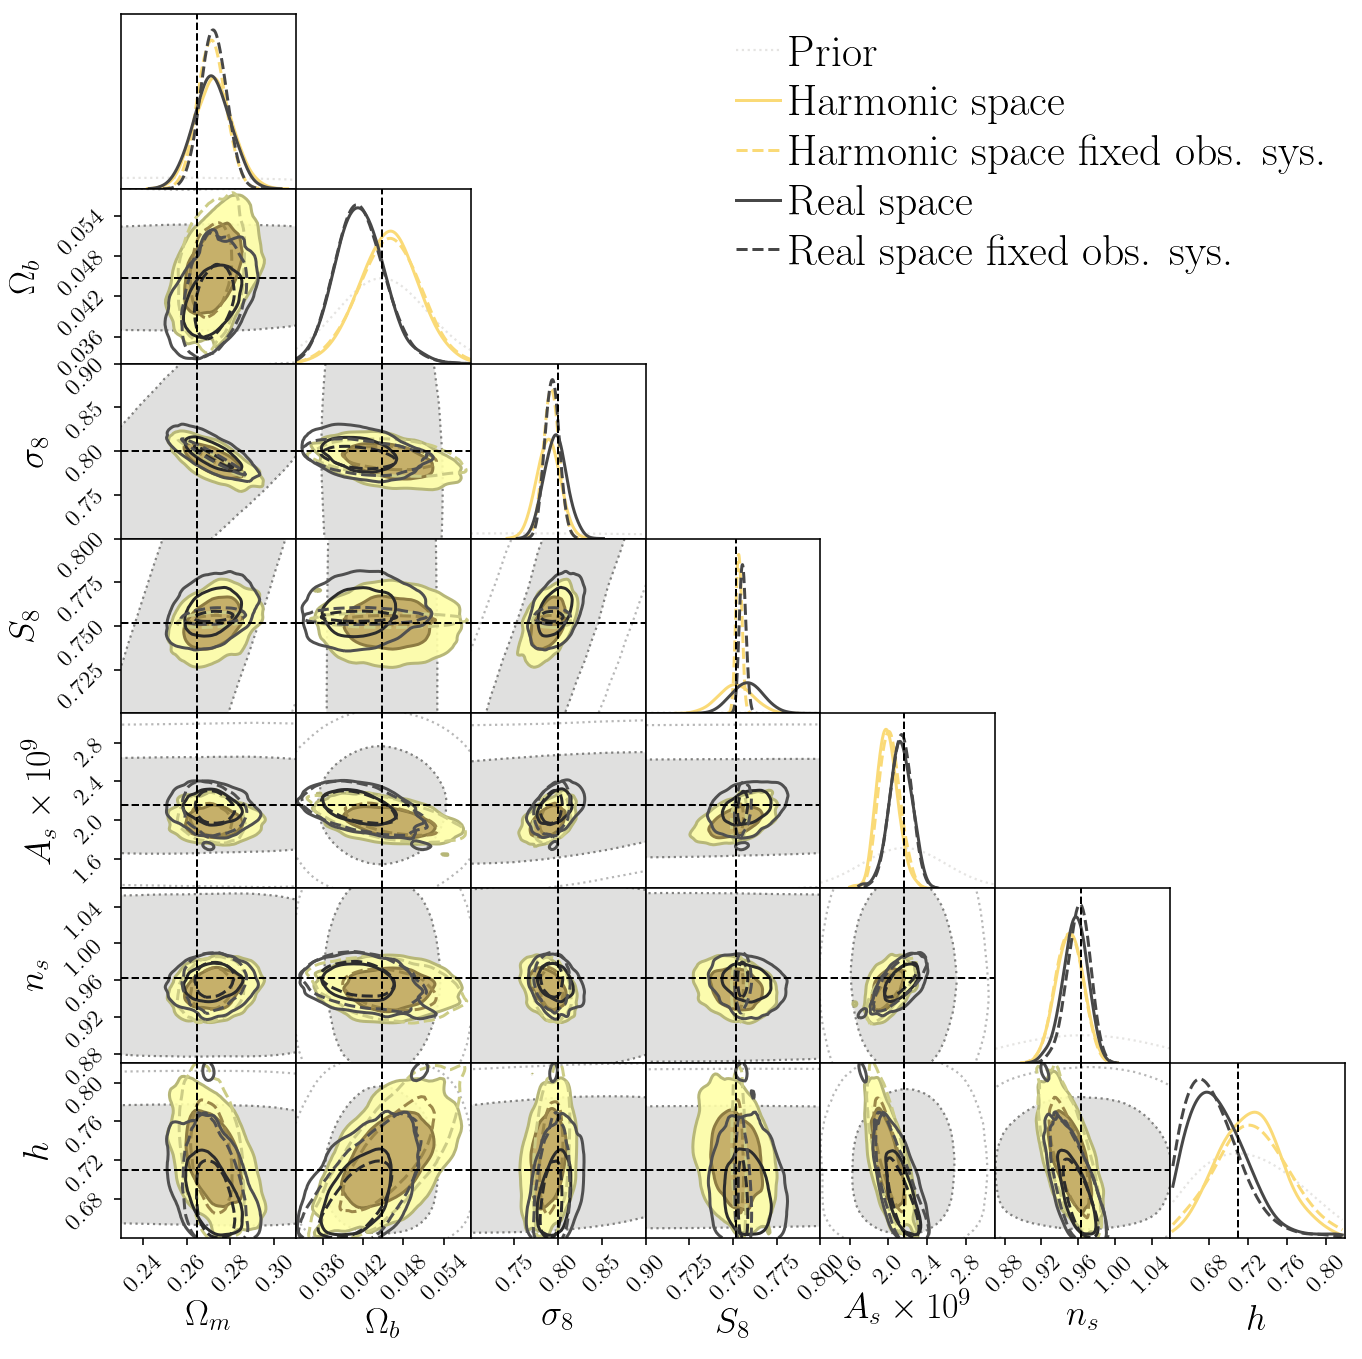

In [8]:
cosmo0 = get_pars(chainfile_0, cosmo_parnames, burnin, chain_0) 
cosmo1 = get_pars(chainfile_1, cosmo_parnames, burnin, chain_1)
cosmo2 = get_pars(chainfile_2, cosmo_parnames, burnin, chain_2)
cosmo3 = get_pars(chainfile_3, cosmo_parnames, burnin, chain_3)
cosmo4 = get_pars(chainfile_4, cosmo_parnames, 0, chain_4) #apriori chain, no burnin

c = ChainConsumer()

c.add_chain(cosmo4, parameters=cosmo_names, name=name_4)
c.add_chain(cosmo0, parameters=cosmo_names, name=name_0)
c.add_chain(cosmo2, parameters=cosmo_names, name=name_2)
c.add_chain(cosmo1, parameters=cosmo_names, name=name_1)
c.add_chain(cosmo3, parameters=cosmo_names, name=name_3)

def call_configure(c):
    c.configure(kde=kde, shade=[True, True,False,False,False,False, False], shade_alpha=[0.4, 0.9, 0.9, 0.9, 0.9], bar_shade=False,colors=["#e5e4e2", colors[3],colors[3], colors[0],colors[0]],legend_kwargs={"fontsize": 22},
            legend_color_text=False, tick_font_size=12, label_font_size=18, linewidths=[1.1, 1.5, 1.5,1.5, 1.5, 1], linestyles=[":", "-", "--","-", "--","-", "-", "--",":"])
    return c

c = call_configure(c)

fig = c.plotter.plot(figsize=(5,5), truth=cosmo_truths, extents=[(0.23, 0.31), (0.032, 0.058), (0.7, 0.9), (0.7, 0.8), (1.3, 3.1), (0.87, 1.06), (0.64, 0.82) ])
fig.set_size_inches(5. + fig.get_size_inches())
fig.savefig(save_plots + '%s_fullcosmo.png'%(name_plots), tight_layout=True, dpi=300)
fig.savefig(save_plots + '%s_fullcosmo.pdf'%(name_plots), tight_layout=True)


## Table values

In [9]:
cosmo_parnames = [  'COSMOLOGICAL_PARAMETERSSIGMA_8', 'COSMOLOGICAL_PARAMETERSOMEGA_M','COSMOLOGICAL_PARAMETERSS_8']
cosmo_names = ['$\sigma_8$', '$\Omega_m$', '$S_8$' ]

cosmo0 = get_indices(chainfile_0, cosmo_parnames)
cosmo1 = get_indices(chainfile_1, cosmo_parnames)
cosmo2 = get_indices(chainfile_2, cosmo_parnames)
cosmo3 = get_indices(chainfile_3, cosmo_parnames)
c = ChainConsumer()

c.add_chain(chain_0[burnin:,cosmo0], parameters=cosmo_names, name=name_0)
c.add_chain(chain_2[burnin:,cosmo2], parameters=cosmo_names, name=name_2)
c.add_chain(chain_1[burnin:,cosmo1], parameters=cosmo_names, name=name_1)
c.add_chain(chain_3[burnin:,cosmo3], parameters=cosmo_names, name=name_3)

def call_configure(c):
    c.configure(kde=2., shade=[True, True,False,False,False,False, False], shade_alpha=[0.4, 0.9, 0.9, 0.9, 0.9], bar_shade=False,colors=["#e5e4e2", colors[3],colors[3], colors[0],  colors[0]],legend_kwargs={"fontsize": 22},
            legend_color_text=False, tick_font_size=12, label_font_size=18, linewidths=[1.1, 1.5, 1.5,1.5, 1.5, 1], linestyles=[":", "-", "--","-", "--","-", "-", "--",":"])
    return c

c = call_configure(c) # also need to call this for tables because smoothing matter to take mean and sigma. 

table = c.analysis.get_latex_table()
print(table)

\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{cccc}
        \hline
		Model & $\sigma_8$ & $\Omega_m$ & $S_8$ \\ 
		\hline
		Harmonic space & $0.789^{+0.013}_{-0.014}$ & $\left( 272.4^{+8.6}_{-9.2} \right) \times 10^{-3}$ & $\left( 751.1^{+10.4}_{-9.7} \right) \times 10^{-3}$ \\ 
		Harmonic space fixed obs. sys. & $\left( 792.0^{+9.2}_{-8.9} \right) \times 10^{-3}$ & $\left( 271.5^{+6.2}_{-6.7} \right) \times 10^{-3}$ & $\left( 753.2^{+1.9}_{-1.7} \right) \times 10^{-3}$ \\ 
		Real space & $0.797^{+0.012}_{-0.014}$ & $\left( 271.1^{+9.1}_{-8.1} \right) \times 10^{-3}$ & $\left( 758.2^{+9.2}_{-9.5} \right) \times 10^{-3}$ \\ 
		Real space fixed obs. sys. & $\left( 793.5^{+7.9}_{-9.1} \right) \times 10^{-3}$ & $\left( 272.1^{+6.2}_{-5.8} \right) \times 10^{-3}$ & $\left( 755.4^{+2.0}_{-1.9} \right) \times 10^{-3}$ \\ 
		\hline
    \end{tabular}
\end{table}


# Plot the rest of the parameters

\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{cccccc}
        \hline
		Model & $m_1$ & $m_2$ & $m_3$ & $m_4$ & $m_5$ \\ 
		\hline
		Prior & $0.000\pm 0.015$ & $0.001^{+0.014}_{-0.015}$ & $0.000\pm 0.015$ & $0.000\pm 0.015$ & $0.000\pm 0.015$ \\ 
		Harmonic space & $-0.002^{+0.011}_{-0.014}$ & $-0.002^{+0.012}_{-0.011}$ & $\left( 14.6^{+10.0}_{-9.0} \right) \times 10^{-3}$ & $\left( -1.9^{+7.9}_{-7.2} \right) \times 10^{-3}$ & $\left( -6.0^{+6.3}_{-6.0} \right) \times 10^{-3}$ \\ 
		Real space & $-0.004^{+0.013}_{-0.012}$ & $-0.004\pm 0.012$ & $\left( 5.7^{+10.0}_{-9.7} \right) \times 10^{-3}$ & $\left( 2.1^{+7.0}_{-9.0} \right) \times 10^{-3}$ & $\left( -6.9^{+6.2}_{-6.6} \right) \times 10^{-3}$ \\ 
		\hline
    \end{tabular}
\end{table}


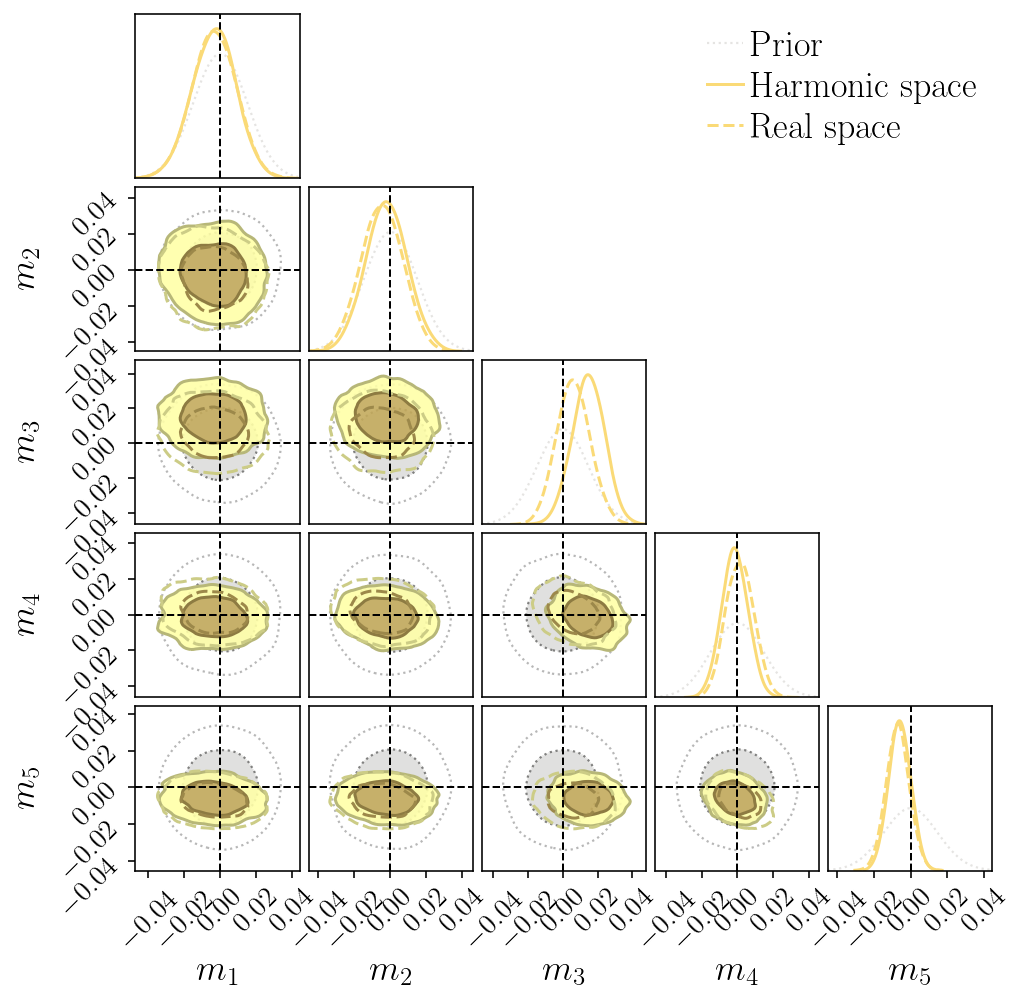

In [10]:
parnames = ['firecrown_two_pointsource_0_mult_bias',
       'firecrown_two_pointsource_1_mult_bias',
       'firecrown_two_pointsource_2_mult_bias',
       'firecrown_two_pointsource_3_mult_bias',
       'firecrown_two_pointsource_4_mult_bias']
names = ['$m_1$', '$m_2$', '$m_3$', '$m_4$', '$m_5$']
truths = [0., 0., 0., 0., 0.]

#widths = np.array([0.013]*len(truths))
#prior = np.random.multivariate_normal(truths,np.diagflat(widths**2),1000)

pars0 = get_indices(chainfile_0, parnames)
pars1 = get_indices(chainfile_1, parnames)
pars4 = get_indices(chainfile_4, parnames)

c = ChainConsumer()
c.add_chain(chain_4[:,pars4], parameters=names, name=name_4)
c.add_chain(chain_0[burnin:,pars0], parameters=names, name=name_0)
c.add_chain(chain_1[burnin:,pars1], parameters=names, name=name_1)

def call_configure(c):
    c.configure(kde=kde, shade=[True, True,False,False,False,False, False], shade_alpha=[0.4, 0.9, 0.9, 0.9, 0.9], bar_shade=False,colors=["#E5E4E2", colors[3],colors[3], colors[0],  colors[0]],legend_kwargs={"fontsize": 18},
            legend_color_text=False, tick_font_size=14, label_font_size=18, linewidths=[ 1.1, 1.5,1.5, 1.5, 1], linestyles=[":", "-", "--","-", "--","-", "-", "--",":"])
    return c

c = call_configure(c)
table = c.analysis.get_latex_table()
print(table)
fig = c.plotter.plot(figsize=(4,4), truth=truths) #extents=[(0.18, 0.27), (0.032, 0.058), (0.7, 0.9), (1.3, 3.1), (0.87, 1.06), (0.64, 0.82), (0.23, 0.31), (-1.6, -0.33), (-1.8, 1.)])
fig.set_size_inches(3. + fig.get_size_inches())
fig.savefig(save_plots + '%s_ms.png'%(name_plots), bbox_inches="tight", dpi=300)
fig.savefig(save_plots + '%s_ms.pdf'%(name_plots), bbox_inches="tight")

\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{cccccc}
        \hline
		Model & $b_1$ & $b_2$ & $b_3$ & $b_4$ & $b_5$ \\ 
		\hline
		Harmonic space & $1.243^{+0.030}_{-0.026}$ & $1.380^{+0.031}_{-0.028}$ & $1.519^{+0.032}_{-0.030}$ & $1.662^{+0.036}_{-0.031}$ & $1.814^{+0.038}_{-0.034}$ \\ 
		Real space & $1.233^{+0.030}_{-0.024}$ & $1.379^{+0.030}_{-0.024}$ & $1.514^{+0.027}_{-0.028}$ & $1.655^{+0.030}_{-0.029}$ & $1.801\pm 0.033$ \\ 
		\hline
    \end{tabular}
\end{table}


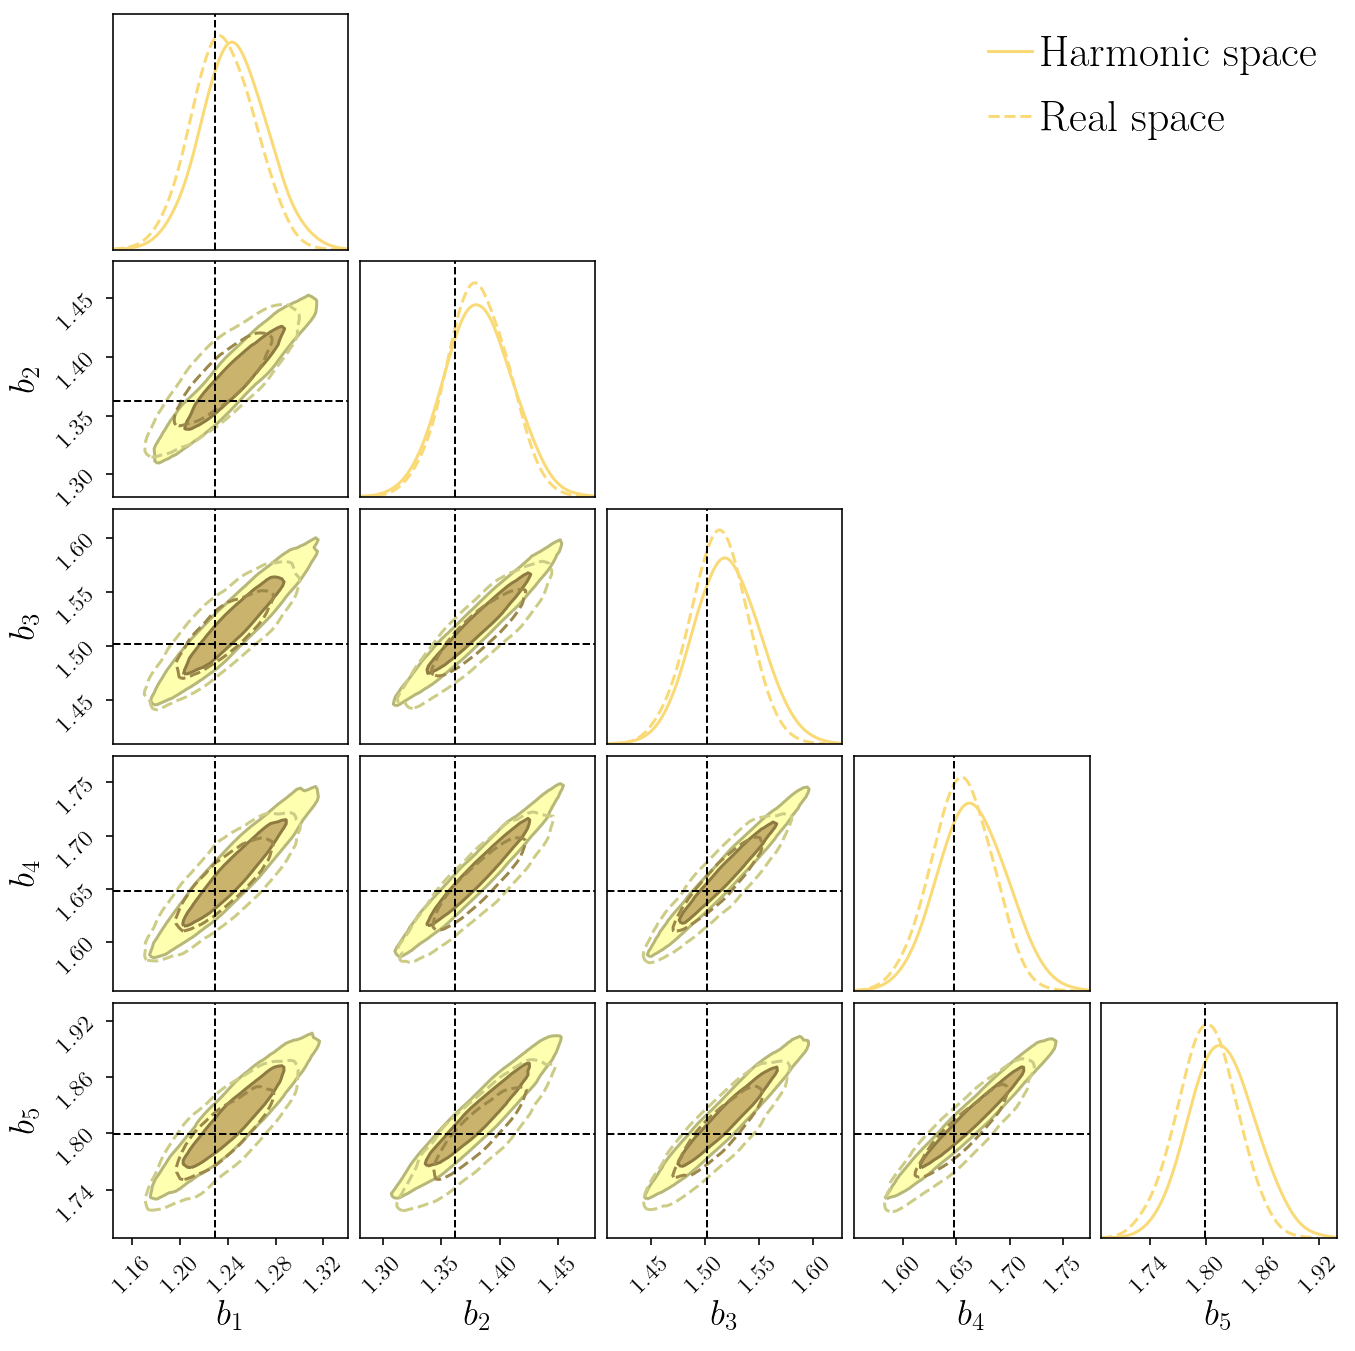

In [12]:
parnames = ['firecrown_two_pointlens_0_bias', 'firecrown_two_pointlens_1_bias',
       'firecrown_two_pointlens_2_bias', 'firecrown_two_pointlens_3_bias',
       'firecrown_two_pointlens_4_bias']
names = ['$b_1$', '$b_2$', '$b_3$', '$b_4$', '$b_5$']
truths = [1.229, 1.362, 1.502, 1.648, 1.799]

pars0 = get_indices(chainfile_0, parnames)
pars1 = get_indices(chainfile_1, parnames)

c = ChainConsumer()
c.add_chain(chain_0[burnin:,pars0], parameters=names, name=name_0)
c.add_chain(chain_1[burnin:,pars1], parameters=names, name=name_1)

def call_configure(c):
    c.configure(kde=kde, shade=[True, False,False,False,False,False, False], shade_alpha=[0.9, 0.9, 0.9, 0.9], bar_shade=False,colors=[ colors[3],colors[3], colors[0],  colors[0]],legend_kwargs={"fontsize": 22},
            legend_color_text=False, tick_font_size=12, label_font_size=18, linewidths=[ 1.5, 1.5,1.5, 1.5, 1], linestyles=["-", "--","-", "--","-", "-", "--",":"])
    return c

c = call_configure(c)
table = c.analysis.get_latex_table()
print(table)
fig = c.plotter.plot(figsize=(5,5), truth=truths) #extents=[(0.18, 0.27), (0.032, 0.058), (0.7, 0.9), (1.3, 3.1), (0.87, 1.06), (0.64, 0.82), (0.23, 0.31), (-1.6, -0.33), (-1.8, 1.)])
fig.set_size_inches(5. + fig.get_size_inches())
fig.savefig(save_plots + '%s_bias.png'%(name_plots), bbox_inches="tight", dpi=300)
fig.savefig(save_plots + '%s_bias.pdf'%(name_plots), bbox_inches="tight")

\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{ccccccccccc}
        \hline
		Model & $\Delta_{z_l^1}$ & $\Delta_{z_l^2}$ & $\Delta_{z_l^3}$ & $\Delta_{z_l^4}$ & $\Delta_{z_l^5}$ & $\Delta_{z_s^1}$ & $\Delta_{z_s^2}$ & $\Delta_{z_s^3}$ & $\Delta_{z_s^4}$ & $\Delta_{z_s^5}$ \\ 
		\hline
		Prior & $\left( -0.1^{+7.6}_{-7.5} \right) \times 10^{-3}$ & $\left( 0.3^{+8.3}_{-8.6} \right) \times 10^{-3}$ & $\left( -0.1^{+9.9}_{-9.6} \right) \times 10^{-3}$ & $0.000\pm 0.011$ & $0.000\pm 0.012$ & $\left( 0.0\pm 2.9 \right) \times 10^{-3}$ & $\left( -0.1^{+3.5}_{-3.3} \right) \times 10^{-3}$ & $\left( 0.0\pm 3.9 \right) \times 10^{-3}$ & $\left( 0.0\pm 4.4 \right) \times 10^{-3}$ & $\left( -0.2^{+6.0}_{-5.8} \right) \times 10^{-3}$ \\ 
		Harmonic space & $\left( -0.3^{+4.6}_{-4.3} \right) \times 10^{-3}$ & $\left( -1.8^{+5.0}_{-5.4} \right) \times 10^{-3}$ & $\left( 0.7^{+5.9}_{-6.0} \right) \times 10^{-3}$ & $\left( -4.8^{+6.4}_{-6.8} \right) \times 

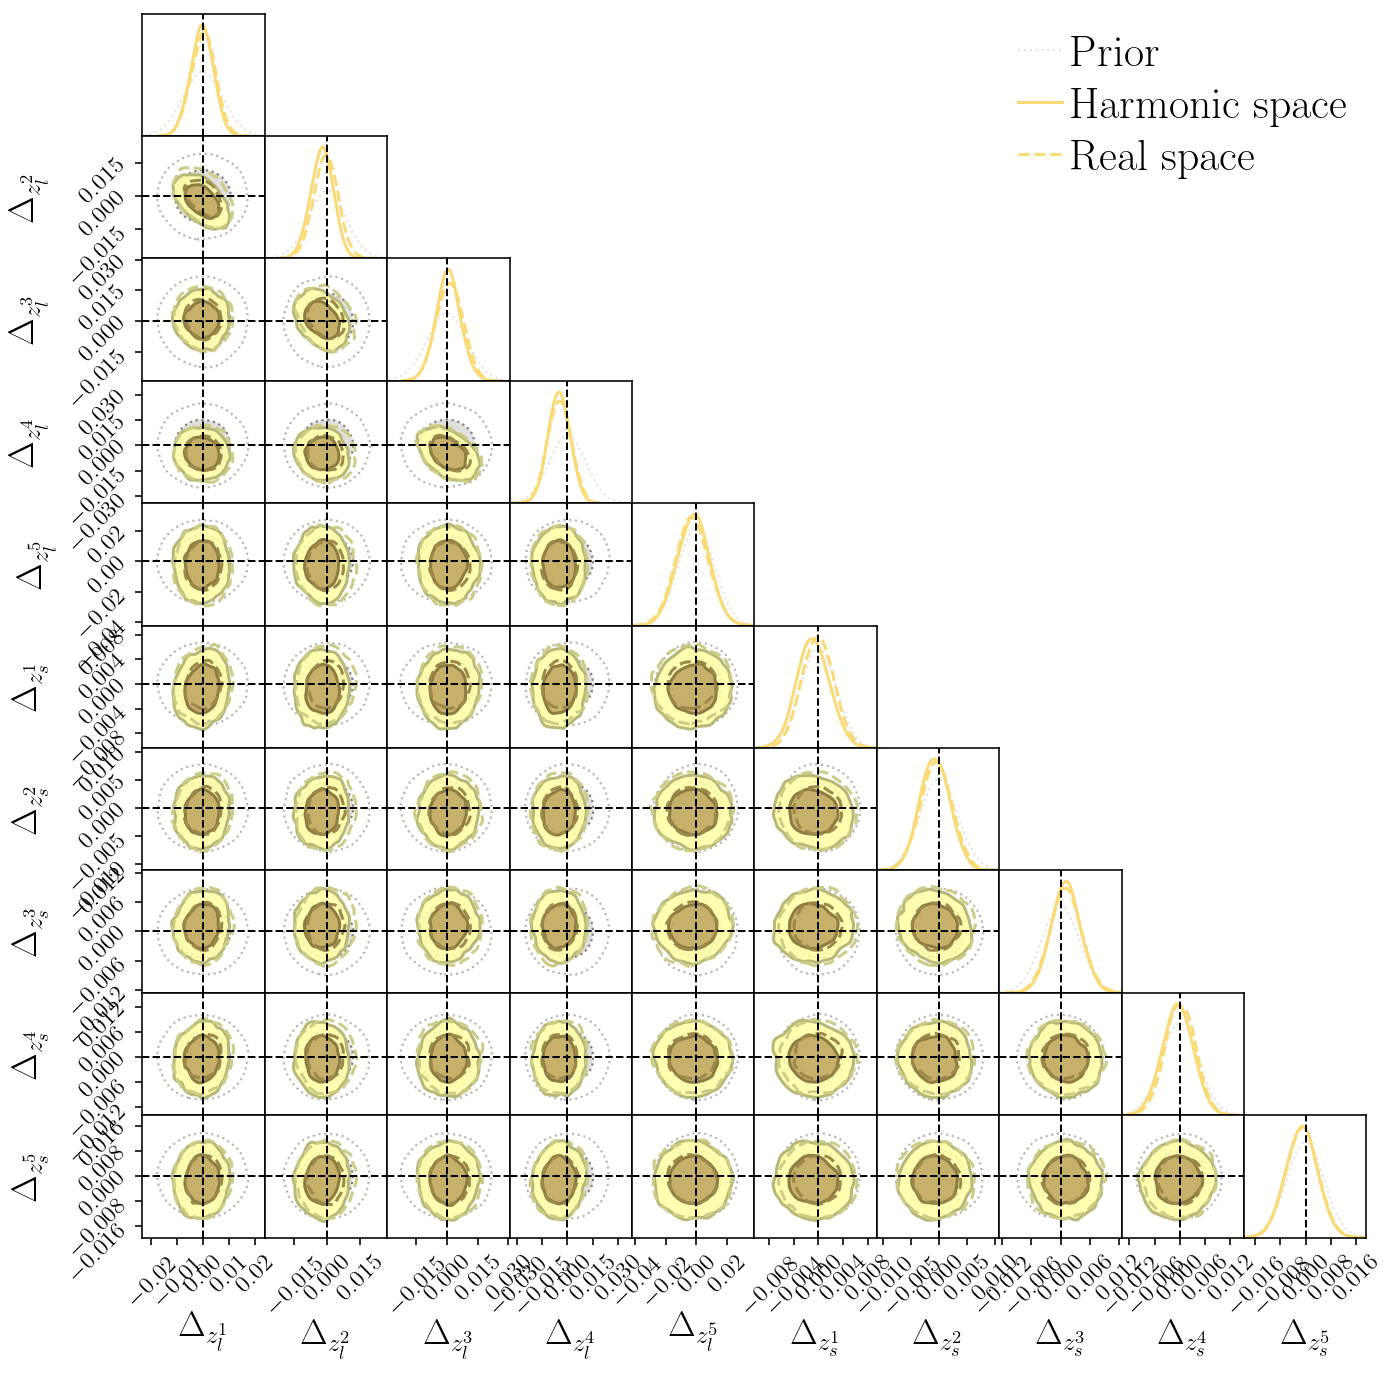

In [15]:
parnames = ['firecrown_two_pointlens_0_delta_z',
       'firecrown_two_pointlens_1_delta_z',
       'firecrown_two_pointlens_2_delta_z',
       'firecrown_two_pointlens_3_delta_z',
       'firecrown_two_pointlens_4_delta_z',
       'firecrown_two_pointsource_0_delta_z',
       'firecrown_two_pointsource_1_delta_z',
       'firecrown_two_pointsource_2_delta_z',
       'firecrown_two_pointsource_3_delta_z',
       'firecrown_two_pointsource_4_delta_z']

names = ['$\Delta_{z_l^1}$', '$\Delta_{z_l^2}$', '$\Delta_{z_l^3}$', '$\Delta_{z_l^4}$', '$\Delta_{z_l^5}$',
        '$\Delta_{z_s^1}$', '$\Delta_{z_s^2}$', '$\Delta_{z_s^3}$', '$\Delta_{z_s^4}$', '$\Delta_{z_s^5}$']
truths = np.array([0]*len(parnames))

# Lens then source
#widths = np.array([0.0066,0.0075,0.0085, 0.0095,0.0105, 0.0026, 0.003, 0.0034, 0.0039, 0.0052])
#prior = np.random.multivariate_normal(truths,np.diagflat(widths**2),1000)

pars0 = get_indices(chainfile_0, parnames)
pars1 = get_indices(chainfile_1, parnames)
pars4 = get_indices(chainfile_4, parnames)

c = ChainConsumer()
c.add_chain(chain_4[:,pars4], parameters=names, name=name_4)
c.add_chain(chain_0[burnin:,pars0], parameters=names, name=name_0)
c.add_chain(chain_1[burnin:,pars1], parameters=names, name=name_1)

def call_configure(c):
    c.configure(kde=kde, shade=[True,True, False,False,False,False,False, False], shade_alpha=[0.4, 0.9, 0.9, 0.9, 0.9], bar_shade=False,colors=[ "#E5E4E2",colors[3],colors[3], colors[0],  colors[0]],legend_kwargs={"fontsize": 22},
            legend_color_text=False, tick_font_size=12, label_font_size=18, linewidths=[ 1.1, 1.5, 1.5,1.5, 1.5, 1], linestyles=[":", "-", "--","-", "--","-", "-", "--",":"])
    return c

c = call_configure(c)
table = c.analysis.get_latex_table()
print(table)
fig = c.plotter.plot(figsize=(5,5), truth=truths) #extents=[(0.18, 0.27), (0.032, 0.058), (0.7, 0.9), (1.3, 3.1), (0.87, 1.06), (0.64, 0.82), (0.23, 0.31), (-1.6, -0.33), (-1.8, 1.)])
fig.set_size_inches(5. + fig.get_size_inches())
fig.savefig(save_plots + '%s_deltazs.png'%(name_plots), bbox_inches="tight", dpi=300)
fig.savefig(save_plots + '%s_deltazs.pdf'%(name_plots), bbox_inches="tight")

\begin{table}
    \centering
    \caption{}
    \label{tab:model_params}
    \begin{tabular}{ccc}
        \hline
		Model & $A_{IA}$ & $\eta_{IA}$ \\ 
		\hline
		Prior & $0.0^{+3.0}_{-2.9}$ & $0.0\pm 2.4$ \\ 
		Harmonic space & $0.036^{+0.066}_{-0.054}$ & $0.9^{+2.1}_{-2.2}$ \\ 
		Real space & $0.076^{+0.066}_{-0.065}$ & $0.9\pm 2.1$ \\ 
		\hline
    \end{tabular}
\end{table}


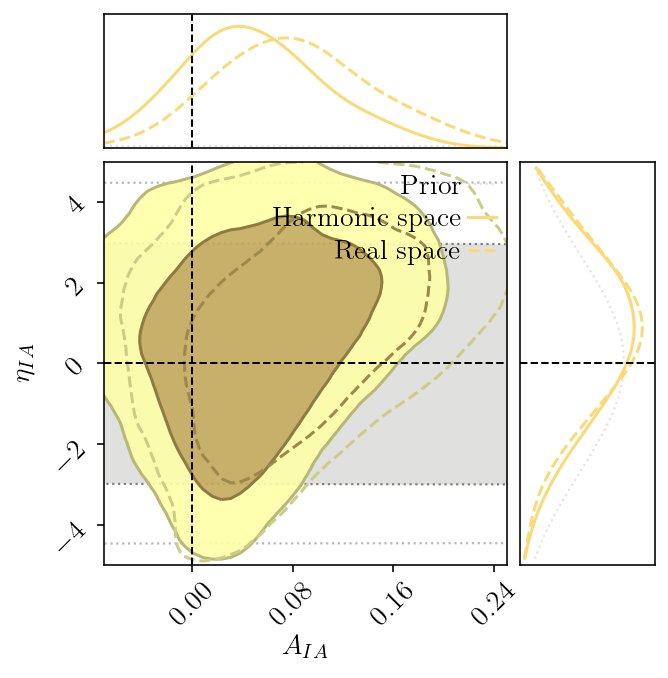

In [16]:
parnames = ['firecrown_two_pointia_bias',
       'firecrown_two_pointalphaz']
names = ['$A_{IA}$', r'$\eta_{IA}$']
truths = [0., 0.]

pars0 = get_indices(chainfile_0, parnames)
pars1 = get_indices(chainfile_1, parnames)
pars4 = get_indices(chainfile_4, parnames)

c = ChainConsumer()

c.add_chain(chain_4[:,pars4], parameters=names, name=name_4)
c.add_chain(chain_0[burnin:,pars0], parameters=names, name=name_0)
c.add_chain(chain_1[burnin:,pars1], parameters=names, name=name_1)

def call_configure(c):
    c.configure(kde=kde, shade=[True, True,False,False,False,False, False], shade_alpha=[0.4, 0.9, 0.9, 0.9, 0.9], bar_shade=False,colors=[ "#E5E4E2",colors[3],colors[3], colors[0],  colors[0]],legend_kwargs={"fontsize": 14},
            legend_color_text=False, tick_font_size=14, label_font_size=14, linewidths=[1.1, 1.5, 1.5,1.5, 1.5, 1], linestyles=[":","-", "--","-", "--","-", "-", "--",":"])
    return c

c = call_configure(c)
table = c.analysis.get_latex_table()
print(table)
fig = c.plotter.plot(figsize=(2.5,2.5), truth=truths, extents = [(-0.07, 0.25), (-5., 5.)]) #extents=[(0.18, 0.27), (0.032, 0.058), (0.7, 0.9), (1.3, 3.1), (0.87, 1.06), (0.64, 0.82), (0.23, 0.31), (-1.6, -0.33), (-1.8, 1.)])
fig.set_size_inches(2. + fig.get_size_inches())
fig.savefig(save_plots + '%s_ia.png'%(name_plots),  bbox_inches="tight", dpi=300)
fig.savefig(save_plots + '%s_ia.pdf'%(name_plots),  bbox_inches="tight")